In [ ]:
                                    #SPHERICAL CLUSTERING

In [8]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import glob
import collections

In [9]:
#Reading input

def getImages(path):
    folder = glob.glob(path)
    dataset = []
    #231 195
    for files in folder:
        img = open(files, 'rb') # Opening the image file
        lines = img.readlines()
        p = []
        for i in lines[4:]:
            
           for j in i:
                p.append(j)
        dataset.append(np.array(p, dtype=int))  
        
    #Splitting data
    
    train_data = [] 
    test_data = []    
    for i in range(1, len(dataset)+1):
        if(i%11 == 0):
            test_data.append(dataset[i-1]/np.linalg.norm(dataset[i-1]))  # Normalising test data
        else:
            train_data.append(dataset[i-1]/np.linalg.norm(dataset[i-1])) # Normalising train data
    train_data = np.array(train_data)
    test_data = np.array(test_data)
    return(train_data, test_data)

In [11]:
#clustering

def sphericalClustering(data, k_max):
    mean = np.random.uniform(10, 50,[k_max,data.shape[1]])   # Initialising means
    mean = (mean.T/np.linalg.norm(mean,axis=1)).T         # Normalising mean data
    flag = True
    while(flag):
        label = np.argmax(np.inner(data, mean), axis = 1)   # Updating labels
        mean_old=mean
        mean= updateMean(data, label, k_max, mean)           # Updating means
        flag = np.min(np.diag(np.inner(mean, mean_old))) < 0.99
        print(collections.Counter(label))                        # Checking termination condition
    return(mean)

In [12]:
def updateMean(data, label, k_max, mean_old): # Mean updation function
    mean = []
    for j in range(k_max):
        index = np.argwhere(label == j).T[0]
        if(len(index) > 0):
            mean.append(np.mean(data[index], axis = 0))
        else:
            mean.append(mean_old[j])
    mean = np.array(mean)
    mean = (mean.T/np.linalg.norm(mean, axis = 1)).T
    return(mean)


In [13]:
def featureExtraction(data, mean):  # Feature extraction function
    feature = (1 + np.inner(data, mean))/2 # Feature transformation
    feature = ((feature.T-np.min(feature, axis = 1))/np.max(feature, axis = 1)).T
    image_data = np.matmul(feature, mean)
    for i in image_data:
        plt.figure()
        plt.imshow(i.reshape(231, 195), cmap = 'gray')  # Plotting image data
    plt.show()    
    

In [14]:
train_data, test_data = getImages("Yale/*") # Function call for image data input


Counter({6: 46, 15: 46, 17: 23, 1: 14, 18: 10, 19: 5, 4: 3, 8: 1, 2: 1, 12: 1})
Counter({6: 42, 15: 32, 17: 23, 1: 12, 4: 11, 12: 9, 8: 7, 19: 5, 18: 5, 2: 4})
Counter({6: 40, 15: 29, 17: 24, 4: 12, 12: 11, 1: 10, 8: 8, 2: 6, 19: 5, 18: 5})


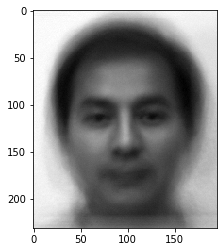

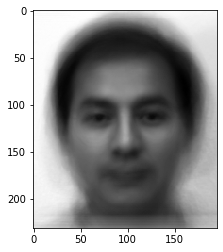

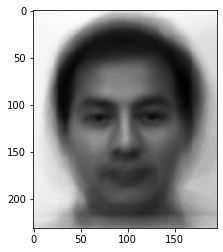

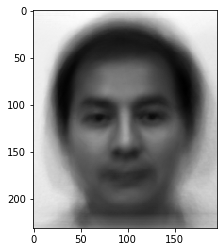

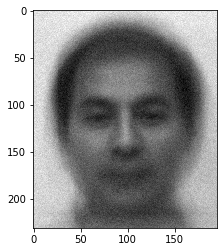

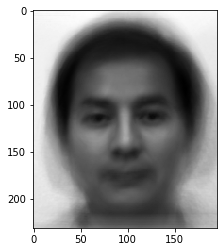

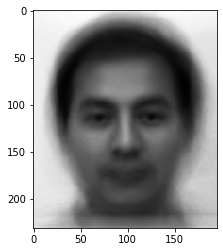

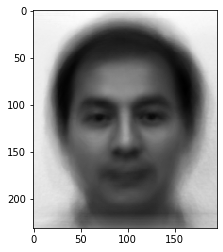

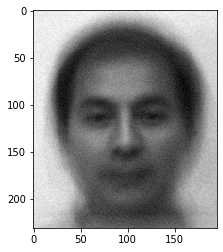

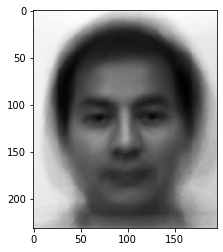

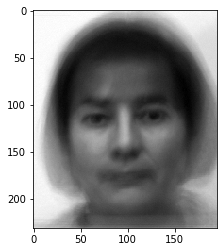

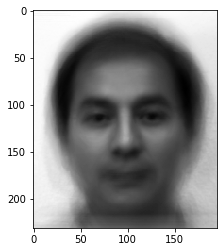

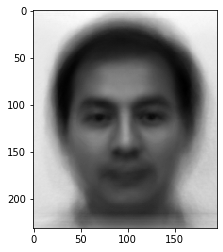

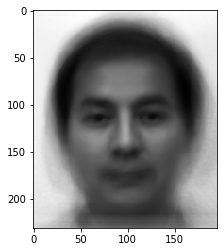

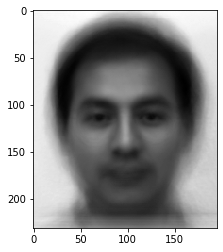

In [15]:
mean = sphericalClustering(train_data, 20) # Function call for spherical clustering
featureExtraction(test_data, mean)    # Function call for feature extraction